In [31]:
import numpy as np
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h3>Student: Eduardo S. Ito RA 159086</h3>'))
display(HTML('<h1>Project 2: Evolutionary Computing</h1>'))
from PIL import Image
import os
os.startfile('p2.pdf')

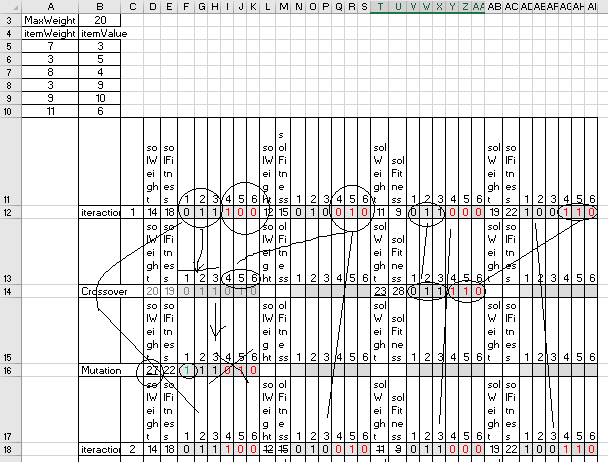

In [9]:
from IPython.core.display import display, HTML
import tabulate
display(HTML('<h2>Initial abstraction</h2>'))
from PIL import Image
path="abstraction.png"
display(HTML('<h3>Objective Function. </h3>'))
display(HTML('<p>The objective function is to fill up knapsack with more valuable products, respecting established maximum\
              weight. Each product has weight and value. The aim is to optimize the filling up of knapsack with more \
              value products and within the maximum weight, as precondition.</p>'))
display(Image.open(path))
display(HTML('<h3>Stop criteria. </h3>'))
display(HTML('<p>The Stop Criteria is reached when maximum value of filled knapsack within maximum weight, \
                 during 3 interactions</p>'))
display(HTML('<h3>References </h3>'))
display(HTML('<p>https://www.youtube.com/watch?v=9kbzMeEBvUY</p>'))

In [80]:
# solution is based on  https://www.researchgate.net/publication/255994405_Genetic_Algorithm_for_Solving_Simple_Mathematical_Equality_Problem

import random
import collections
import numpy as np

# Knapsack maximum capabilityKnapsack
maxWeight=20

# Product List for Knapsack
popgen={1: [7, 3], 2: [3, 5], 3: [8, 4], 4: [3, 9], 5: [9, 10], 6: [11, 6] }

# Step B- Define necessary functions
def binvalue(arg):
    n=len(arg)
    s=0
    k=1
    for i in arg:
        s=s+(2**k)*i
        k=k+1
    return s

def weight(arg):
    n=len(arg)
    s=0
    k=1
    for i in arg:
        x=popgen[k][0]
        s=s+x*i
        k=k+1
    return s

def reverse(arg):
    n=len(arg)
    s=0
    k=1
    s=[]
    for i in reversed(arg):
        s.append(i)
        k=k+1
    return s

# Generate random populations whose parameters are (n, s) where n is the number of population, and s is the size of population
def genpopulation(n):
    s=len(popgen)
    t=2**s-1 
    population={}
    i=1
    while (i<=n):
        pop=[]
        x=int(random.randint(1,maxWeight))
        y=[int(i) for i in np.binary_repr(x, s)]
        pop=reverse(y)
        check=binvalue(pop)
        ok=0
        for k in population:
            a=weight(population[k])
            if(a>maxWeight):
                ok=1
            x=binvalue(population[k])
            if(check==x or check==0):
                ok=1
        if(ok==0):
            population[i]=pop
            i=i+1
            
    return population

#define objective function
def of(arg):
    n=len(arg)
    t={}
    for i in arg:
        s1=0
        s2=0
        k=1
        print("")
        print(arg[i])
        for j in arg[i]:
            if(j==1):
                s1=s1+popgen[k][0]
                s2=s2+popgen[k][1]
            k=k+1
        t[i]=[s1, s2]
        print(t[i])
    
    return t

# Define sum function value
def sumlist(arg):
    n=len(arg)
    s=0
    for i in range(0,n):
        s=s+arg[i]
    return s

def sum(arg):
    s=0
    for i in arg:
        s=s+i
    return s
# Define Probability Distribution function 
def prob(arg):
    p={}
    total=sum(arg)
    for i in arg:
        p[i]=i/total
    return p

# Define Cumulative Probability function using roulette-wheel
def cprob(arg):
    c={}
    s=0
    for i in arg:
        s=arg[i]+s
        c[i]=s
    return c

# genereate cumulative fitness probabilities
def gfitprob(n):
    pre=[]
    p={}
    pc={}
    for i in range(1, n+1):
        x=random.random()
        pre.append(x)
    pre=sorted(pre)
    j=1
    for i in pre:
        p[j]=i
        j=j+1

    return p

#Select chromosomes
def whichchrom(generatedfit,cumulativefit,chrome):
    n=len(cumulativefit)
    #print("whichchrom="+str(chrome))
    j=1
    k=1
    l=1
    previousk=0
    index={}
    newpopulation={}
    during=0
    previous=0
    aux=0
    
    for i in range(1,n+1):
        #print(i)
        if(k>n): break
        while((generatedfit[k]<=cumulativefit[i]) and (previous<generatedfit[k])):
                index[k]=i
                k=k+1
                aux=1
                if(k>n):
                    break
        if(aux!=0):
            aux=0
        previous=cumulativefit[i]
        
    
        
    for i in index:
        #print("index="+str(index[i]))
        newpopulation[i]=chrome[index[i]]
    
  
    return newpopulation 

#Select population from crossover
def selectpopulationforcrossover(population,cross_rate):
    n=len(population)
    R={}

    m=0
    while(m<2):
        selectedpopulation={}
        k=1
        while(k<n+1):
             R[k]=random.random()
             if(R[k]<cross_rate):
                selectedpopulation[k]=population[k]
             k=k+1
             m=len(selectedpopulation)
    return selectedpopulation


# apply crossover (or reproduction) on two chromosomes
def crossover(chromo1,chromo2,position):
    for i in range(0,position):
        x=chromo1[i]
        chromo2[i]=x
    chromo = chromo2

    return chromo

#Apply crossover to the selected population
def applycrossover(population):
    n=len(population)
    nb=5 # number of elements in chromosomes
    newpopulation={}
    C={}
    m=int(n*(n-1)/2)
    for i in range(1,m+1):
        C[i]=random.randint(1,nb-1)
    print('')
    print("random number for position in chromosomes")  
    print(C)
    print("")
    k=1
        
    for i in range(1,n+1):
        for j in range(i+1,n+2):
            #print("i="+str(i)+"]="+str(i)+" ,j="+str(j))
            if((i in population) and (j in population)):     
                   if(i in newpopulation):
                      print("population["+str(j)+"]="+str(population[j])+",population["+str(i)+"]="+str(population[i]))
                      x=crossover(population[j],population[i],C[k])
                      newpopulation[j]=x
                      print("newpopulation["+str(j)+"]="+str(x))
                   else:
                      print("population["+str(i)+"]="+str(population[i])+",population["+str(j)+"]="+str(population[j]))
                      x=crossover(population[i],population[j],C[k])
                      newpopulation[i]=x
                      print("newpopulation["+str(i)+"]="+str(x))
                   print("gene position for crossover(C)="+str(C[k]))
                   print("")
                   k=k+1                

    return newpopulation 

def mutation(population, rate):
    n=len(population)
    print(population)
    nb=len(popgen) # number of elements in chromosomes
    nab=n*nb # number of elements in all chromosomes
    number_of_mutation=int(rate*nab)
    newpopulation={}
    C={}
    for i in range(1,number_of_mutation+1):
        x=random.randint(1,nab)
        while(not(x in C)):
            C[i]=x
            x=random.randint(1,nab)
    print('')
    print("genes to be changed")   
    print(C)
    print('')
    k=0
    for i in C:
        j=int((C[i])/nb)
        mod=C[i]%nb
        if(mod==0):
            k=j
        else:
            k=j+1
        m=nb-(k*nb-C[i])-1
        print("C["+str(i)+"]="+str(C[i])+",element position="+str(m))
        pop=population[k]
        mask1=0
        mask2=0
        aux=0
        
        gen=pop[m]
        if(gen==1): gen=0
        else: gen=1
        print('gen='+str(gen)+',pop='+str(pop))
        pop[m]=gen
        aux=pop
   
        newpopulation[k]=aux   
        print("population["+str(k)+"]="+str(population[k]))
        print('')
  
    return newpopulation 

In [117]:
#STEP1. Initialization - Initial population
chrom=genpopulation(4) # generate n chromosomes in a population
print("initial population")
print("Element represents a items of a product list (1..n). A product i=1 if included, and 0 otherwise.")
print("")
print(chrom)

initial population
Element represents a items of a product list (1..n). A product i=1 if included, and 0 otherwise.

{1: [0, 0, 0, 1, 0, 0], 2: [1, 1, 1, 0, 0, 0], 3: [0, 1, 0, 0, 0, 0], 4: [0, 0, 0, 0, 1, 0]}


In [119]:
# STEP2. Evaluation (lower value, shorted path)

#Check now the result from initial population
aaa=of(chrom)


[0, 0, 0, 1, 0, 0]
[3, 9]

[1, 1, 1, 0, 0, 0]
[18, 12]

[0, 1, 0, 0, 0, 0]
[3, 5]

[0, 0, 0, 0, 1, 0]
[9, 10]


In [120]:
# STEP3. Selection
s1=of(chrom)
aux=[]
k=1
for i in s1: 
    aux.append(s1[i][0])
    k=k+1
s=prob(aux)
k=cprob(s)
p=1
c={}
for i in k:
    c[p] = k[i]
    p=p+1
l=gfitprob(4)
a=whichchrom(l,c,chrom)
print("")
print("New population for next generation:")
print(a)


[0, 0, 0, 1, 0, 0]
[3, 9]

[1, 1, 1, 0, 0, 0]
[18, 12]

[0, 1, 0, 0, 0, 0]
[3, 5]

[0, 0, 0, 0, 1, 0]
[9, 10]
{1: [1, 1, 1, 0, 0, 0], 2: [1, 1, 1, 0, 0, 0], 3: [1, 1, 1, 0, 0, 0]}

New population for next generation:
{1: [1, 1, 1, 0, 0, 0], 2: [1, 1, 1, 0, 0, 0], 3: [1, 1, 1, 0, 0, 0]}


In [121]:
# STEP 4. Selection of population with crossover (execute this step several times until population is generated)
rate=0.5 # 50% are selected
b=selectpopulationforcrossover(a, rate)
print("selection of population for crossover:")
print(b)
c=applycrossover(b)
print(" ")
print("population with only crossover:")
print(c)

# STEP 5. Selection of population with crossover and mutation
pm=0.20 # mutation rate of 20% 
d=mutation(c, pm)
print(" ")
print("population with only mutation cases:")
print(d)
for i in c:
    if(not(i in d)):
        d[i]=c[i]
print(" ")
print("total population with crossover and mutation cases:")
print(d)

selection of population for crossover:
{1: [1, 1, 1, 0, 0, 0], 3: [1, 1, 1, 0, 0, 0]}

random number for position in chromosomes
{1: 4}

population[1]=[1, 1, 1, 0, 0, 0],population[3]=[1, 1, 1, 0, 0, 0]
newpopulation[1]=[1, 1, 1, 0, 0, 0]
gene position for crossover(C)=4

 
population with only crossover:
{1: [1, 1, 1, 0, 0, 0]}
{1: [1, 1, 1, 0, 0, 0]}

genes to be changed
{1: 2}

C[1]=2,element position=1
gen=0,pop=[1, 1, 1, 0, 0, 0]
population[1]=[1, 0, 1, 0, 0, 0]

 
population with only mutation cases:
{1: [1, 0, 1, 0, 0, 0]}
 
total population with crossover and mutation cases:
{1: [1, 0, 1, 0, 0, 0]}


In [107]:
# STEP 6. Selection of population after crossover and mutation
for i in a:
    if(not(i in d)):
        d[i]=a[i]
print(" ")
print("total population including crossover and mutation cases:")
print(d)

# STEP7. Evaluation 
dd=of(d)

 
total population including crossover and mutation cases:
{1: [1, 1, 0, 1, 1, 1], 2: [1, 1, 0, 1, 1, 1], 3: [1, 1, 1, 0, 1, 1], 4: [1, 1, 1, 0, 1, 1]}

[1, 1, 0, 1, 1, 1]
[33, 33]

[1, 1, 0, 1, 1, 1]
[33, 33]

[1, 1, 1, 0, 1, 1]
[38, 28]

[1, 1, 1, 0, 1, 1]
[38, 28]


In [108]:
# STEP6. Evaluation 
print(of(a))


[1, 1, 0, 1, 1, 1]
[33, 33]

[1, 1, 0, 1, 1, 1]
[33, 33]

[1, 1, 1, 0, 1, 1]
[38, 28]

[1, 1, 1, 0, 1, 1]
[38, 28]
{1: [33, 33], 2: [33, 33], 3: [38, 28], 4: [38, 28]}


{1: [1, 0, 0, 1, 0, 1], 2: [1, 0, 1, 0, 1, 1], 3: [1, 1, 0, 0, 0, 0], 4: [1, 0, 0, 0, 0, 0]}
{1: [21, 18], 2: [35, 23], 3: [10, 8], 4: [7, 3]}
